### Receiver Operating Characteristic and Area Under Curve

#### Problem statement

In this self-studying work we will try to compute and then draw ROC-curve, after that we'll try to calculate ROC-AUC metric. Put your seat belts on!

In [128]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [129]:
# constants section

NUM_THRESH = 50 #number of thresholds for determining classes
NUM_SAMPLES = 200 #number of samples - 'observations' in dataset to learn on
RANDOM_STATE = 2025 #this thing's needed for 'stability' of random numbers by every run

#### Generating dataset for binary classification

In [131]:
# using sklearn method to create a dataset for classification 
df = make_classification(n_samples=NUM_SAMPLES, n_features=5, n_informative=3, n_redundant=2, random_state=RANDOM_STATE)

df_feat = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5'], data = df[0])
df_target = pd.DataFrame(columns=['target'], data=df[1])

In [132]:
print('The feature dataset, generated by Sklearn "make_classification"\n', df_feat[:5])
print('Dimensions of feature ds\' =', df_feat.shape)
print('\nThe target dataset, generated by Sklearn "make_classification"\n', df_target[:5])
print('Dimensions of target ds\' =', df_target.shape)

The feature dataset, generated by Sklearn "make_classification"
          f1        f2        f3        f4        f5
0 -0.534428 -1.612811 -0.730425 -1.836132 -1.651032
1 -1.144811 -0.146545 -0.347278 -1.834569 -0.663548
2  1.484992  1.389500  1.665222 -0.843564  1.267734
3  0.535105 -1.970911 -0.293594 -1.953536 -1.702718
4 -0.962812 -0.134577 -0.144527 -2.331638 -0.692390
Dimensions of feature ds' = (200, 5)

The target dataset, generated by Sklearn "make_classification"
    target
0       1
1       1
2       0
3       0
4       1
Dimensions of target ds' = (200, 1)


In [133]:
print('Classes distribution:')
df_target.value_counts()

Classes distribution:


target
1         101
0          99
Name: count, dtype: int64

#### Running a logistic regression model

In [135]:
X = df_feat
y = df_target.values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
log_reg = LogisticRegression() #just basic LogReg will do
log_reg.fit(X_train, y_train.ravel()) #they want 1D array here, so we use .ravel on y_train
results = log_reg.predict_proba(X_test) #to construct ROC we need probabilities of classes, not classes
exact_roc_auc = roc_auc_score(y_test, results[:, 1]) #exact roc-auc is kindly provided by Sklearn

In [137]:
print('Exact meaning of ROC_AUC =', exact_roc_auc)

Exact meaning of ROC_AUC = 0.8262987012987013


**Let's gather thresholds for classes determination, number of which is equal to NUM_THRESH**

In [139]:
# thresholds = np.linspace(0.01, 0.99, NUM_THRESH) #first version's boundaries
thresholds = np.linspace(0, 1, NUM_THRESH)
thresholds

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

<u>When the values 0 and 1 were included in the thresholds, the ROC curve began to expand to the boundaries and result was calculated surprisingly accurately!</u>

Let's put thresholds and true values to a dataframe, and then use this dataframe for recording predicted classes on different thresholds.

In [142]:
thresh_table = pd.DataFrame()
thresh_table['ground_truth'] = y_test[:, 0]
thresh_table['pred_probs'] = results[:, 1]

#### Calculating predicted classes for different thresholds

For each threshold we need to re-calculate classes. For instance, if threshold is 0.53 and we predict probability of 0.55, this will be counted as class '1'. But if the threshold is 0.6? Right, in this case class will become '0'.<br>
That's the basic idea for ROC: we calculate classes for different thresholds - so that we can compute metrics for different thresholds and then draw the curve.

In [145]:
for i in range(NUM_THRESH):
    thresh_table['Thre='+str(round(thresholds[i], 3))] = thresh_table['pred_probs'].apply(lambda x: 1 if x > thresholds[i] else 0)

In [146]:
thresh_table[:5]

,ground_truth,pred_probs,Thre=0.0,Thre=0.02,Thre=0.041,Thre=0.061,Thre=0.082,Thre=0.102,Thre=0.122,Thre=0.143,...,Thre=0.816,Thre=0.837,Thre=0.857,Thre=0.878,Thre=0.898,Thre=0.918,Thre=0.939,Thre=0.959,Thre=0.98,Thre=1.0
0,0,0.034335,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.533288,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.991190,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,0,0.617764,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.998106,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


#### Calculating the metrics we need for ROC-chart

<b>For building a ROC chart we need these metrics: True Positive Rate (TPR) and False Positive Rate (FPR).</b><br>
<br>
TPR - this, in fact, is a Recall, it's ideal meaning = 1:<br>
TPR = TP/(TP + FN)<br><br>
FPR - share of False Positives amongst all Negatives, it's ideal meaning = 0:<br>
FPR = FP/(FP + TN)


Let's calculate these values in a loop for each threshold for classes prediction.

In [150]:
metrics = pd.DataFrame(index=['TPR', 'FPR', 'TP', 'FN', 'TN', 'THR'])

for i in range(NUM_THRESH):
    # True Positive's counting
    TP = ((thresh_table.iloc[:, i+2] == 1) & (thresh_table.iloc[:, 0] == 1)).sum()
    # False Negative's counting
    FN = ((thresh_table.iloc[:, i+2] == 0) & (thresh_table.iloc[:, 0] == 1)).sum()
    # False Positive's counting
    FP = ((thresh_table.iloc[:, i+2] == 1) & (thresh_table.iloc[:, 0] == 0)).sum()
    # True Negative's counting
    TN = ((thresh_table.iloc[:, i+2] == 0) & (thresh_table.iloc[:, 0] == 0)).sum()
    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    col_to_add = np.array([TPR, FPR, TP, FN, TN, round(thresholds[i], 3)])
    metrics[i] = col_to_add

display(metrics)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
TPR,1.0,1.000000,1.000000,0.954545,0.954545,0.954545,0.954545,0.954545,0.954545,0.909091,...,0.545455,0.545455,0.500000,0.454545,0.454545,0.409091,0.272727,0.272727,0.227273,0.0
FPR,1.0,0.821429,0.642857,0.607143,0.571429,0.571429,0.571429,0.571429,0.535714,0.500000,...,0.107143,0.107143,0.107143,0.071429,0.035714,0.035714,0.035714,0.000000,0.000000,0.0
TP,22.0,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,...,12.000000,12.000000,11.000000,10.000000,10.000000,9.000000,6.000000,6.000000,5.000000,0.0
FN,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,10.000000,11.000000,12.000000,12.000000,13.000000,16.000000,16.000000,17.000000,22.0
TN,0.0,5.000000,10.000000,11.000000,12.000000,12.000000,12.000000,12.000000,13.000000,14.000000,...,25.000000,25.000000,25.000000,26.000000,27.000000,27.000000,27.000000,28.000000,28.000000,28.0
THR,0.0,0.020000,0.041000,0.061000,0.082000,0.102000,0.122000,0.143000,0.163000,0.184000,...,0.816000,0.837000,0.857000,0.878000,0.898000,0.918000,0.939000,0.959000,0.980000,1.0


#### Chart of Receiver Operating Characteristic

**All the needed metrics are calculated. We can draw now!**

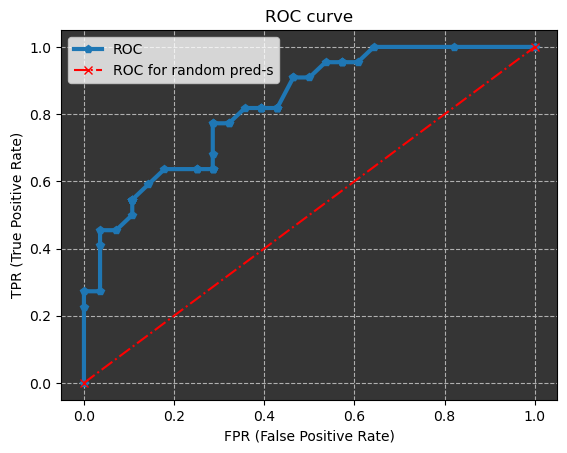

In [153]:
# mpl.plot(metrics.loc['FPR'], metrics.loc['TPR'], 'bo', label='ROC') # if we want to draw dots 
mpl.plot(metrics.loc['FPR'], metrics.loc['TPR'], marker='p', label='ROC', linewidth=3) # ... lines
mpl.plot([0, 1], [0, 1], 'rx', linestyle='-.', label='ROC for random pred-s')
mpl.title('ROC curve')
mpl.xlabel('FPR (False Positive Rate)')
mpl.ylabel('TPR (True Positive Rate)')
mpl.grid(linestyle='--')
mpl.gca().set_facecolor('#353535')
mpl.legend();

Now that looks like real data! Before using <i>make_classification</i> we had tried classic Iris-dataset, but the results were too ideal (roc_auc = 1).


#### Approximate calculation of ROC-AUC metric

Next, why don't we try to calculate the value of area under ROC-curve, a.k.a ROC-AUC metric?<br>
We could compute sum of areas of rectangles with one side = FPR <i>increment</i>, and other side = mean "height" of corresponding bounds of TPR. And if we have a big amount of thresholds, this sum will be close to the real area value.<br>
OK, challenge accepted!<br><br>
To make the task more graphic, let's take several 'points' in whole value of NUM_THRESH to see, how number of this thresholds affects calculation of area. Supposedly, <i>the more divisions is the more accurate calculation</i>.

In [157]:
metrics

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
TPR,1.0,1.000000,1.000000,0.954545,0.954545,0.954545,0.954545,0.954545,0.954545,0.909091,...,0.545455,0.545455,0.500000,0.454545,0.454545,0.409091,0.272727,0.272727,0.227273,0.0
FPR,1.0,0.821429,0.642857,0.607143,0.571429,0.571429,0.571429,0.571429,0.535714,0.500000,...,0.107143,0.107143,0.107143,0.071429,0.035714,0.035714,0.035714,0.000000,0.000000,0.0
TP,22.0,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,...,12.000000,12.000000,11.000000,10.000000,10.000000,9.000000,6.000000,6.000000,5.000000,0.0
FN,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,10.000000,11.000000,12.000000,12.000000,13.000000,16.000000,16.000000,17.000000,22.0
TN,0.0,5.000000,10.000000,11.000000,12.000000,12.000000,12.000000,12.000000,13.000000,14.000000,...,25.000000,25.000000,25.000000,26.000000,27.000000,27.000000,27.000000,28.000000,28.000000,28.0
THR,0.0,0.020000,0.041000,0.061000,0.082000,0.102000,0.122000,0.143000,0.163000,0.184000,...,0.816000,0.837000,0.857000,0.878000,0.898000,0.918000,0.939000,0.959000,0.980000,1.0


Code for computing approximate ROC_AUC with different amounts of thresholds (we're taking numbers in range from 2 to NUM_THRESH with step of 3).

In [159]:
# lets set a range of thresholds numbers to see how it affects precision of area calc.
num_thresh = np.arange(2, NUM_THRESH, step=3)
apr_values = pd.DataFrame(columns=['number_of_thresholds', 'roc_auc_computed'])

for n in num_thresh:
    area = 0
    for i in range(n-1):
        dy = (metrics.loc['TPR', i] + metrics.loc['TPR', i+1])/2 #in real curves usually y_1 != y_2, and mean value would be more suitable
        dx = abs(metrics.loc['FPR', i] - metrics.loc['FPR', i+1])
        area += dx*dy
    apr_values = pd.concat((apr_values, pd.DataFrame([{'number_of_thresholds':n, 'roc_auc_computed':area}])), axis=0)

C:\Users\Professional\AppData\Local\Temp\ipykernel_7076\2719882526.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  apr_values = pd.concat((apr_values, pd.DataFrame([{'number_of_thresholds':n, 'roc_auc_computed':area}])), axis=0)


##### Calculated values of ROC-AUC metric with different numbers of thresholds

Lets visualize what we've gotten.

,number_of_thresholds,roc_auc_computed
0,2,0.178571
1,5,0.426136
2,8,0.426136
3,11,0.525974
4,14,0.556818
5,17,0.586039
6,20,0.586039
7,23,0.643669
8,26,0.671266
9,29,0.671266


Exact value of ROC-AUC metric = 0.82630


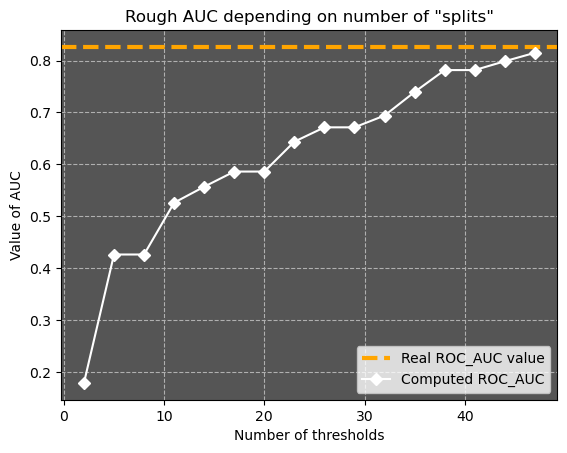

In [162]:
display(apr_values.reset_index(drop=True))
print(f'Exact value of ROC-AUC metric = {exact_roc_auc:.5f}')

mpl.axhline(exact_roc_auc, linestyle='--', color='orange', label='Real ROC_AUC value', linewidth=3)
mpl.plot(apr_values['number_of_thresholds'], apr_values['roc_auc_computed'], color='white', marker='D', label='Computed ROC_AUC', )
mpl.grid(linestyle='--')
mpl.xlabel('Number of thresholds')
mpl.ylabel('Value of AUC')
mpl.title('Rough AUC depending on number of "splits"')
mpl.gca().set_facecolor('#555')
mpl.legend();

**With an increase of number of thresholds, i. e. with a decrease of the step along the X-axis, the accuracy of calculating the area increases and gets closer to the true ROC-AUC value - as it expected by design.**<br>
<i>Note that final number of thresholds is less than NUM_THRESH - it's because we got the range by some step.</i>  

#### Conclusion